In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"


/Users/csuarezgurruchaga/Desktop/Digital-House/CLASE_48/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
nltk=3.5 already installed
unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


<img src='../../../common/logo_DH.png' align='left' width=35%/>

# Series de Tiempo - Práctica Guiada

<a id="section_toc"></a> 
## Tabla de Contenidos

[1- Intro](#section_intro)

[2- Descomposición de una serie de tiempo](#section_descomposicion)

$\hspace{.5cm}$[2.1- Tendencia](#section_tendencia)

$\hspace{.5cm}$[2.2- Estacionalidad](#section_estacionalidad)

[3- Primeros modelos para prónosticos](#section_modelos_basicos)

$\hspace{.5cm}$[3.1- Análisis exploratorio y preprocesamiento de los datos](#section_eda_preprocesamiento)

$\hspace{.5cm}$[3.2- Media Constante](#section_media_constante)

$\hspace{.5cm}$[3.3- Random Walk](#section_random_walk)

$\hspace{.5cm}$[3.4- Tendencia Lineal](#section_tendencia_lineal)

$\hspace{.5cm}$[3.5- Tendencia Cuadrática](#section_tendencia_cuadratica)

$\hspace{.5cm}$[3.6- Tendencia Transformación Logarítmica](#section_tendencia_transformacion_log)

$\hspace{.5cm}$[3.7- Tendencia Transformación Logarítmica + Estacionalidad](#section_tendencia_transformacion_log_estacionalidad)

$\hspace{.5cm}$[3.8- Single Exponential Smoothing](#section_exponential_smoothing)

---

<a id="section_intro"></a> 
###  1- Intro
[volver a TOC](#section_toc)

Esta clase sigue principalmente la exposición de *Elements of Forecasting (2001)* de Francis X. Diebold. 

#### ¿Qué es una serie de tiempo?

Podemos definir una **serie de tiempo** como un conjunto de observaciones tomadas en **intervalos regulares** que se encuentran **ordenadas** por el momento en que se produjeron.

El análisis de series de tiempo se suele utilizar para proyectar o pronosticar la evolución de una variable a lo largo del tiempo, a partir de información previa sobre esa misma variable. Es decir, tenemos que proyectar una variable determinada (eje y) en función del tiempo (eje x). 

Un ejemplo de serie de tiempo puede ser la evolución del precio de un determinado activo financiero a lo largo del tiempo como en la siguiente imagen:

![image.png](img/Picture1.png)

Otros ejemplos pueden ser:

- Variables macroeconómicas, como el PBI, inflación, reservas del BCRA, etc.
- Ventas de comercios
- Consumo energético


<div id="caja1" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/> </div>
  <div style="float:left;width: 85%;"><label>¿Cuáles podrían ser otros ejemplos de series de tiempo? <br/> 

<a id="section_descomposicion"></a> 
### 2- Descomposición de una serie de tiempo
[volver a TOC](#section_toc)

Existen distintos tipos de modelos para tratar las series de tiempo. 
Una opción es modelar una serie de tiempo como compuesta por **cuatro componentes**:
- **Tendencia**: componente “permanente”, el efecto persiste en el largo plazo. Se puede interpretar como lo que motiva el cambio a largo plazo de la media.
- **Estacionalidad**: esta componente aporta movimientos periódicos a la serie.
- **Ciclos**: se entiende por cualquier tipo de dinámica no capturada por la tendencia o la estacionalidad. Estamos ante la presencia de ciclos cuando observamos algún tipo de dinámica mediante la cual el presente está vinculado al pasado. No tiene por qué ser un ciclo rígido.
- **Componente aleatoria**: son shocks que no presentan un efecto duradero, ya que las suponemos i.i.d. con media 0 y varianza constante.

De manera aditiva, podemos decir entonces que: 

$$ y_t = T_t + S_t + C_t + \varepsilon_t. $$

… donde T es la tendencia, S es el efecto estacional C es el ciclo y $ \varepsilon $ es el error aleatorio.

<a id="section_tendencia"></a> 
#### 2.1- Tendencia
[volver a TOC](#section_toc)

La **tendencia** corresponde a la **evolución de largo plazo** de la variable que estamos analizando. Puede ser generada por la lenta evolución y cambios en las preferencias, la tecnología, las instituciones o en la demografía.


###### Ejemplo 1: Tasa de participación de las mujeres en la fuerza laboral (USA)

<img src="img/Picture2.png" width="450">


Podemos modelar la tendencia de diferentes maneras, dependiendo de la dinámica de la tendencia. 

##### Tendencia lineal:

$$ T_t = \beta_0 + \beta_1 TIME_t + \varepsilon_t. $$

Donde la variable *TIME* es una variable que construimos artificialmente, llamada “dummy de tiempo”.

Veamos unos ejemplos de tendencia lineal al variar los parámetros:


<img src="img/Picture3.png" width="450">

Veamos ahora cómo ajusta la tendencia lineal a la serie de la participación de las mujeres en la fuerza laboral de USA:

<img src="img/Picture4.png" width="450">
Vemos que la tendencia lineal ajusta bien a la tendencia de nuestra serie. Vemos que en el resíduo no parecen quedar dinámicas relacionadas a la tendencia.

<br/> 
 
###### Ejemplo 2: Volumen del New York Exchange
<img src="img/Picture5.png" width="450">


Si la tendencia que estamos buscando modelar presenta una dinámica no lineal, podemos incluir un **término cuadrático** al modelo. Lo obtenemos simplemente elevando al cuadrado a la dummy de tiempo:

$$ T_t = \beta_0 + \beta_1 TIME_t + \beta_2 TIME^{2}_t +\varepsilon_t. $$

Veamos qué tal ajusta nuestra tendencia cuadrática a la serie del NY Exchange:

<img src="img/Picture6.png" width="450">
Vemos que la tendencia cuadrática en este caso no ajusta bien a la tendencia de nuestra serie. Podemos observarlo en el residuo de nuestro modelo.

Probemos modelar a la serie del NY Exchange de otra manera. Si la tendencia está caracterizada por una tasa de crecimiento constante, podemos usar un **modelo exponencial**:

$$ T_t = \beta_0 e^{\beta_1 TIME_t}\varepsilon_t. $$

Si en lugar de modelar directamente la tendencia, modelamos su **logaritmo natural**, volvemos a tener un modelo lineal:

$$ \ln{T_t} = \ln{\beta_0} + \beta_1 TIME_t + \ln{\varepsilon_t}. $$

<img src="img/Picture7.png" width="450">

Vemos que el modelo logarítmico sí ajusta correctamente a nuestra serie.

Es relevante también tener en cuenta que realizar la transformación logarítmica también es útil cuando queremos estabilizar la dispersión de nuestra serie. 

Tenemos que tener en cuenta que debemos **revertir la transformación (back-transform)** para obtener forecasts en la escala original.


<a id="section_estacionalidad"></a> 
#### 2.2- Estacionalidad
[volver a TOC](#section_toc)

Un **patrón estacional** se repite con regularidad. La estacionalidad surge de vínculos entre el calendario y las tecnologías, las preferencias o las instituciones.

Por ejemplo podemos ver un patrón estacional en la venta de bebidas alcohólicas en Estados Unidos:

<img src="img/Picture8.png" width="450">

Podemos modelar la estacionalidad utilizando variables dummy. En el siguiente ejemplo modelamos una estacionalidad trimestral:

<img src="img/Picture9.png" width="300">

$$ S_t = \sum_{i=1}^{s} \gamma_iD_it  + \varepsilon_t. $$

Podemos agregar otro tipo de dummies, por ejemplo por días de vacaciones/feriados o ajustes por cantidad de días de comercio, etc.

<div id="caja1" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/> </div>
  <div style="float:left;width: 85%;"><label>¿Se les ocurren otros fenómenos que podrían generar patrones estacionales? ¿Cómo los modelarían?<br/> 

<a id="section_modelos_basicos"></a> 
### 3- Modelos básicos para pronósticos
[volver a TOC](#section_toc)

Pasemos al código para poner estos conceptos en práctica. 

En esta clase vamos a usar series de tiempo para predecir las ventas de medicamentos para diabetes en Australia.


***Nota: en esta práctica guiada, vas a encontrar algunas celdas donde vas a tener que completar con tu propio código. Son pequeños ejercicios simples, para usar código que ya deberías conocer de clases anteriores o que ya se presentó en esta práctica. Completarlo te va a servir para fijar mejor los conceptos y corroborar tu comprensión del tema.***

Primero importamos las librerías necesarias para trabajar con datos y visualizar:

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

from scipy import stats
from statistics import mode

import warnings
warnings.filterwarnings('ignore')

<a id="section_eda_preprocesamiento"></a> 
#### 3.1- Análisis exploratorio y preprocesamiento de los datos:
[volver a TOC](#section_toc)

Creamos nuestro DataFrame y realizamos un ploteo inicial:

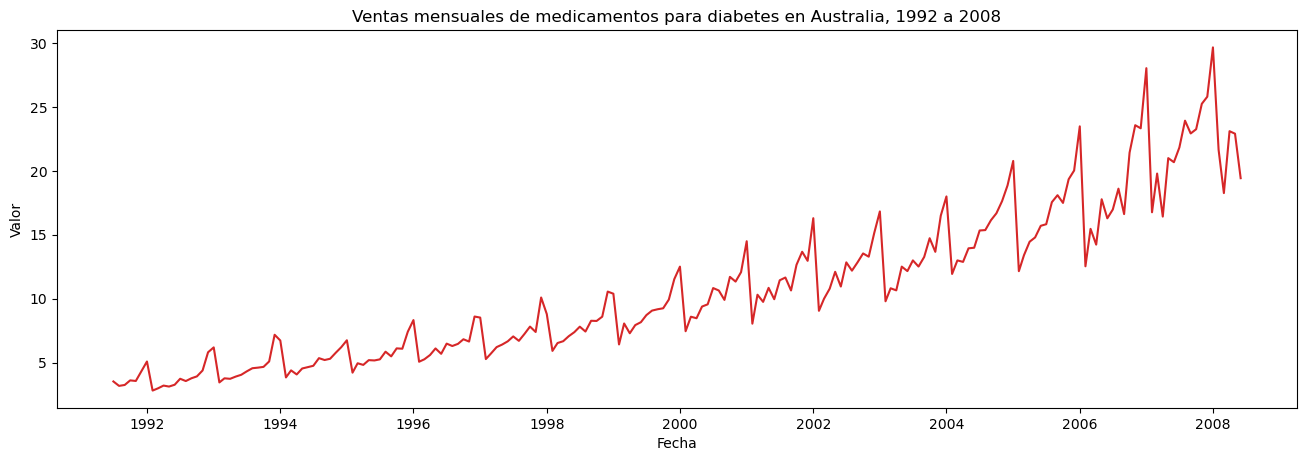

In [3]:
df = pd.read_csv('../Data/a10.csv', parse_dates=['date'], index_col='date')

# Función que plotea la serie:
def plot_df(df, x, y, title="", xlabel='Fecha', ylabel='Valor', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.value,\
        title='Ventas mensuales de medicamentos para diabetes en Australia, 1992 a 2008')

Exploramos las primeras 5 observaciones de nuestro df:

In [4]:
# POR FAVOR COMPLETÁ CON TU CÓDIGO:
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


Ploteamos la estacionalidad:

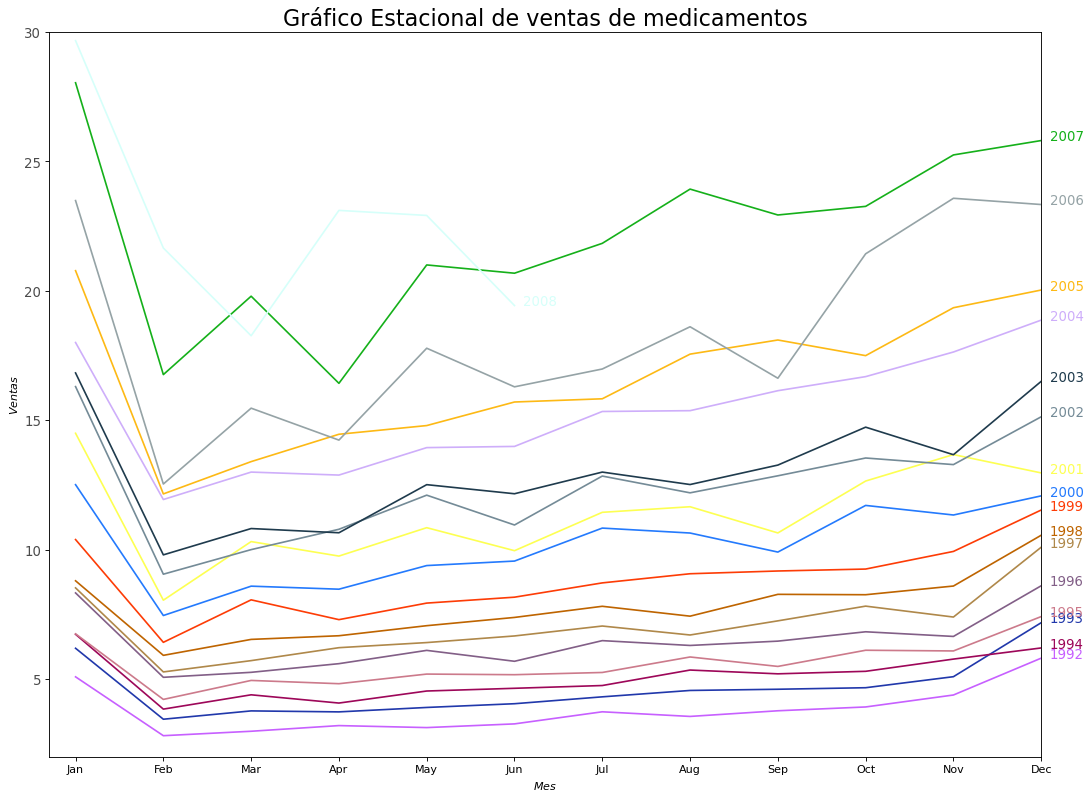

In [5]:
# Preparamos los datos:
df['year'] = [d.year for d in df.index]
df['month'] = [d.strftime('%b') for d in df.index]
years = df['year'].unique()

# Preparamos los colores:
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Ploteamos
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'value', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'value'][-1:].values[0], y, fontsize=12, color=mycolors[i])


plt.gca().set(xlim=(-0.3, 11), ylim=(2, 30), ylabel='$Ventas$', xlabel='$Mes$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Gráfico Estacional de ventas de medicamentos", fontsize=20);

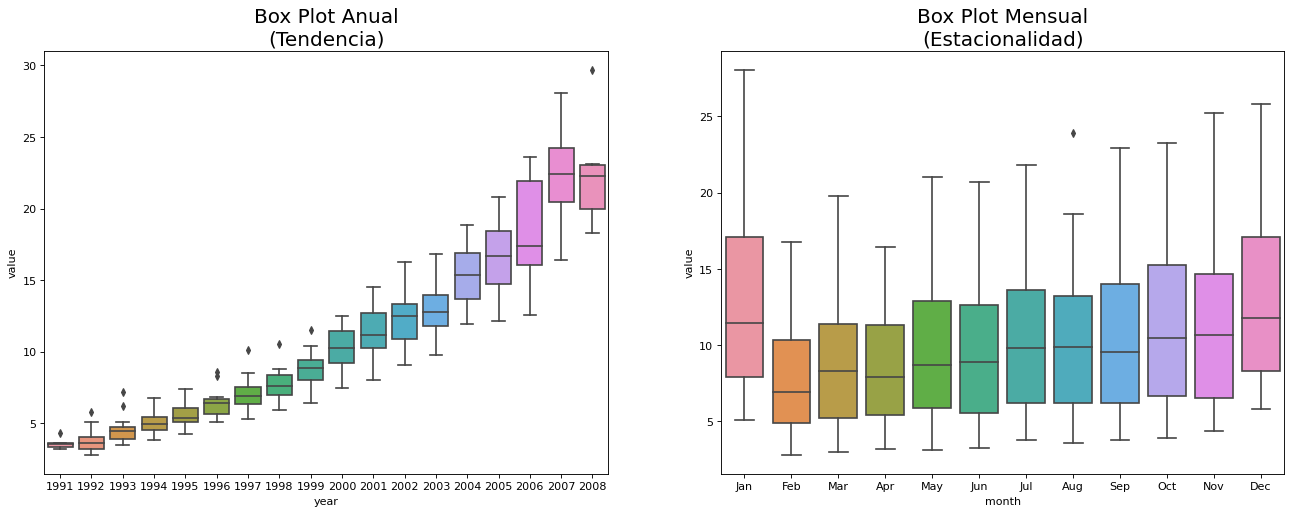

In [6]:
# Definimos los plots:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='value', data=df, ax=axes[0])
sns.boxplot(x='month', y='value', data=df.loc[~df.year.isin([1991, 2008]), :])

# Seteamos los títulos:
axes[0].set_title('Box Plot Anual\n(Tendencia)', fontsize=18); 
axes[1].set_title('Box Plot Mensual\n(Estacionalidad)', fontsize=18);

Veamos el shape de nuestro df:

In [7]:
# POR FAVOR COMPLETÁ CON TU CÓDIGO:
df.shape

(204, 3)

Vamos a crear una **dummy de tiempo**, es decir indicador numérico para el período de tiempo,  para poder modelar la tendencia lineal.

También vamos a crear una variable que sea la dummy de tiempo elevada al cuadrado para modelar la tendencia cuadrática:

In [8]:
df["timeIndex"] = pd.Series(np.arange(len(df['value'])), index=df.index)
df["timeIndex_sq"] = df["timeIndex"]**2

In [9]:
# Creamos variables dummy para los meses:
dummies_mes = pd.get_dummies(df['month'], drop_first=True)
dummies_mes.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
date,,,,,,,,,,,
1991-07-01,0,0,0,0,1,0,0,0,0,0,0
1991-08-01,1,0,0,0,0,0,0,0,0,0,0
1991-09-01,0,0,0,0,0,0,0,0,0,0,1
1991-10-01,0,0,0,0,0,0,0,0,0,1,0
1991-11-01,0,0,0,0,0,0,0,0,1,0,0


In [10]:
# Hacemos el join entre el DataFrame con la serie de tiempo y las dummies:

# POR FAVOR COMPLETÁ CON TU CÓDIGO:
df = df.join(dummies_mes)
df.sample(10)

,value,year,month,timeIndex,timeIndex_sq,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
date,,,,,,,,,,,,,,,,
2008-06-01,19.431740,2008,Jun,203,41209,0,0,0,0,0,1,0,0,0,0,0
2000-02-01,7.457199,2000,Feb,103,10609,0,0,1,0,0,0,0,0,0,0,0
2004-05-01,13.943447,2004,May,154,23716,0,0,0,0,0,0,0,1,0,0,0
1996-02-01,5.069796,1996,Feb,55,3025,0,0,1,0,0,0,0,0,0,0,0
1994-12-01,6.204593,1994,Dec,41,1681,0,1,0,0,0,0,0,0,0,0,0
1993-03-01,3.772307,1993,Mar,20,400,0,0,0,0,0,0,1,0,0,0,0
1999-10-01,9.251887,1999,Oct,99,9801,0,0,0,0,0,0,0,0,0,1,0
1995-06-01,5.170787,1995,Jun,47,2209,0,0,0,0,0,1,0,0,0,0,0
2002-05-01,12.106705,2002,May,130,16900,0,0,0,0,0,0,0,1,0,0,0


Vamos a hacer un split entre train y test, teniendo en cuenta que, al tratarse de una serie de tiempo, tenemos que poner *shuffle=False*.

In [11]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=12, random_state=42, shuffle=False)

<div id="caja1" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/> </div>
  <div style="float:left;width: 85%;"><label>¿Qué problema metodológico generaría hacer el split con shuffle=True? <br/> 

Verificamos la continuidad entre los sets de entrenamiento y de testeo:

In [12]:
# Vemos los últimos datos del set de entrenamiento:

df_train.tail()

,value,year,month,timeIndex,timeIndex_sq,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
date,,,,,,,,,,,,,,,,
2007-02-01,16.763869,2007,Feb,187,34969,0,0,1,0,0,0,0,0,0,0,0
2007-03-01,19.792754,2007,Mar,188,35344,0,0,0,0,0,0,1,0,0,0,0
2007-04-01,16.427305,2007,Apr,189,35721,0,0,0,0,0,0,0,0,0,0,0
2007-05-01,21.000742,2007,May,190,36100,0,0,0,0,0,0,0,1,0,0,0
2007-06-01,20.681002,2007,Jun,191,36481,0,0,0,0,0,1,0,0,0,0,0


In [13]:
# Vemos los primeros datos del set de testeo:

# POR FAVOR COMPLETÁ CON TU CÓDIGO:
df_test.head()

,value,year,month,timeIndex,timeIndex_sq,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
date,,,,,,,,,,,,,,,,
2007-07-01,21.834890,2007,Jul,192,36864,0,0,0,0,1,0,0,0,0,0,0
2007-08-01,23.930204,2007,Aug,193,37249,1,0,0,0,0,0,0,0,0,0,0
2007-09-01,22.930357,2007,Sep,194,37636,0,0,0,0,0,0,0,0,0,0,1
2007-10-01,23.263340,2007,Oct,195,38025,0,0,0,0,0,0,0,0,0,1,0
2007-11-01,25.250030,2007,Nov,196,38416,0,0,0,0,0,0,0,0,1,0,0


Vemos que hay continuidad entre el set de entrenamiento y el de testeo. Podemos entrenar los modelos con datos hasta septiembre de 2006 y testear con datos desde octubre en adelante, sin riesgo de data leakage. 

Ahora sí, pasemos a definir nuestros primeros modelos básicos de series de tiempo:

<a id="section_media_constante"></a> 
#### 3.2- Media Constante:
[volver a TOC](#section_toc)

La **media constante** es el modelo más básico e ingenuo de todos. Consiste simplemente en tomar la media del set de entrenamiento y utilizar ese valor para realizar predicciones. Puede usarse como un baseline para comparar otros modelos, pero difícilmente sea nuestro modelo final.

In [14]:
# Calculamos el promedio:
model_mean_pred = df_train['value'].mean()

# La predicción es fija y es la misma para el set de testeo y de entrenamiento:
df_train["Mean"] = model_mean_pred
df_test["Mean"] = model_mean_pred

<div id="caja1" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/> </div>
  <div style="float:left;width: 85%;"><label>¿Tendría sentido calcular la media para el set de testeo y estimar la bondad del modelo con ese valor?¿Por qué? <br/>

No, porque nunca tendremos a disposicion los datos de test.

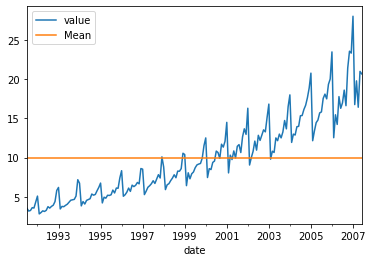

In [15]:
# Ploteamos los valores del set de entrenamiento y el modelo:
df_train.plot(kind="line", y = ["value", "Mean"]);

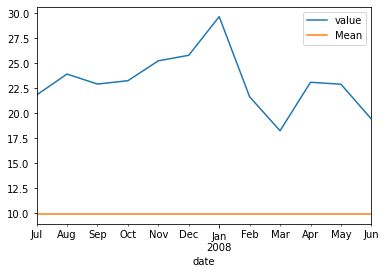

In [16]:
# Ploteamos los valores del set de testeo y el modelo

# POR FAVOR COMPLETÁ CON TU CÓDIGO:
df_test.plot(kind="line", y = ["value", "Mean"]);

* ¿Cuán bien ajusta esta estimación?

Primero definimos una función que calcula el **RMSE**. 

In [17]:
def RMSE(predicted, actual):
    mse = (predicted - actual) ** 2
    rmse = np.sqrt(mse.sum() / mse.count())
    return rmse

In [18]:
model_mean_RMSE = RMSE(df_test.Mean, df_test.value)
model_mean_RMSE

13.55559205561688

In [19]:
# Guardamos el resultado en un DataFrame:
df_Results = pd.DataFrame(columns = ["Model", "RMSE"])
df_Results.loc[0, "Model"] = "Mean"
df_Results.loc[0, "RMSE"] = model_mean_RMSE
df_Results.head()

,Model,RMSE
0,Mean,13.5556


<a id="section_random_walk"></a> 
#### 3.3- Random Walk:
[volver a TOC](#section_toc)

Decimos que un proceso $ {Y_t} $ es **random walk** (sigue una trayectoria al azar si):

$$ \ {Y_t} = Y_ {t-1} + \varepsilon,  $$

siendo epsilon **ruido blanco**. Si al modelo anterior le añadimos una constante $d$, obtenemos un **random walk con deriva (with drift)**:

$$ \ {Y_t} = Y_ {t-1} + d + \varepsilon $$

Cuando nos enfrentamos a una serie de tiempo que muestra una evolución irregular, la mejor estrategia no es tratar de predecir directamente el nivel de la serie en cada período (es decir, el valor Yt), sino el cambio que ocurre de un período al siguiente (es decir, la diferencia Yt - Yt-1). **Se observa la primera diferencia (o lag) de la serie para encontrar un patrón predecible**.

A los efectos del pronóstico del próximo período, puede ser tan bueno predecir el nivel como la variación, ya que el cambio predicho puede agregarse al nivel actual para generar un nivel pronosticado. El caso más simple de dicho modelo es uno que siempre predice que el siguiente cambio será cero, como si la serie tuviera la misma probabilidad de subir o bajar en el próximo período, independientemente de lo que haya sucedido en el pasado.

Generamos el desplazamiento de nuestro nuestro target en el set de entrenamiento (lag=1):

In [20]:
df_train["valueShift1"] = df_train.value.shift()

# La primera observación nos va a quedar en nan, la reemplazamos por el valor siguente:
df_train["valueShift1"].fillna(method='bfill', inplace=True)
df_train.head()

,value,year,month,timeIndex,timeIndex_sq,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mean,valueShift1
date,,,,,,,,,,,,,,,,,,
1991-07-01,3.526591,1991,Jul,0,0,0,0,0,0,1,0,0,0,0,0,0,9.914647,3.526591
1991-08-01,3.180891,1991,Aug,1,1,1,0,0,0,0,0,0,0,0,0,0,9.914647,3.526591
1991-09-01,3.252221,1991,Sep,2,4,0,0,0,0,0,0,0,0,0,0,1,9.914647,3.180891
1991-10-01,3.611003,1991,Oct,3,9,0,0,0,0,0,0,0,0,0,1,0,9.914647,3.252221
1991-11-01,3.565869,1991,Nov,4,16,0,0,0,0,0,0,0,0,1,0,0,9.914647,3.611003


In [21]:
df_train.tail()

,value,year,month,timeIndex,timeIndex_sq,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mean,valueShift1
date,,,,,,,,,,,,,,,,,,
2007-02-01,16.763869,2007,Feb,187,34969,0,0,1,0,0,0,0,0,0,0,0,9.914647,28.038383
2007-03-01,19.792754,2007,Mar,188,35344,0,0,0,0,0,0,1,0,0,0,0,9.914647,16.763869
2007-04-01,16.427305,2007,Apr,189,35721,0,0,0,0,0,0,0,0,0,0,0,9.914647,19.792754
2007-05-01,21.000742,2007,May,190,36100,0,0,0,0,0,0,0,1,0,0,0,9.914647,16.427305
2007-06-01,20.681002,2007,Jun,191,36481,0,0,0,0,0,1,0,0,0,0,0,9.914647,21.000742


Generamos el desplazamiento de nuestro nuestro target en el set de testeo (lag=1):

In [22]:
df_test["valueShift1"] = df_test.value.shift()

# Podemos reemplazar el primer nan con el último valor del set de entrenamiento:
df_test.iloc[0,17] = df_train.iloc[-1,0]
df_test.head()

,value,year,month,timeIndex,timeIndex_sq,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,Mean,valueShift1
date,,,,,,,,,,,,,,,,,,
2007-07-01,21.834890,2007,Jul,192,36864,0,0,0,0,1,0,0,0,0,0,0,9.914647,20.681002
2007-08-01,23.930204,2007,Aug,193,37249,1,0,0,0,0,0,0,0,0,0,0,9.914647,21.834890
2007-09-01,22.930357,2007,Sep,194,37636,0,0,0,0,0,0,0,0,0,0,1,9.914647,23.930204
2007-10-01,23.263340,2007,Oct,195,38025,0,0,0,0,0,0,0,0,0,1,0,9.914647,22.930357
2007-11-01,25.250030,2007,Nov,196,38416,0,0,0,0,0,0,0,0,1,0,0,9.914647,23.263340


Vamos a hacer un scatterplot entre las observaciones y su lag de un período:

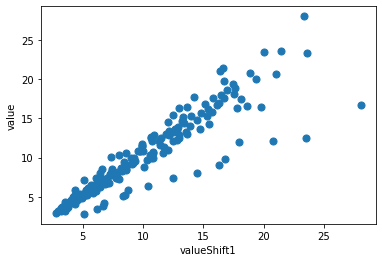

In [23]:
df_train.plot(kind= "scatter", y = "value", x = "valueShift1", s = 50);

Ploteamos la diferencia entre nuestro target y el lag de un período:

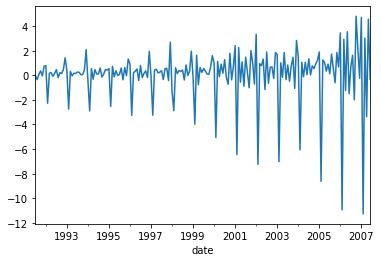

In [24]:
df_train["valueDiff"] = df_train.value - df_train.valueShift1
df_train.valueDiff.plot();

Como la perturbación aleatoria tiene media igual a cero, la predicción del Random Walk va a ser el valor del lag de un período:

$$ Y_t = Y_{t-1} $$

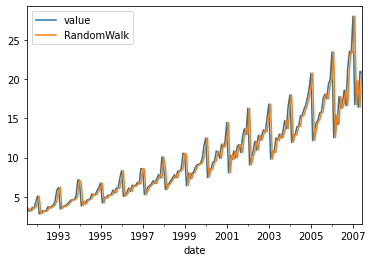

In [25]:
df_train["RandomWalk"] = df_train.valueShift1
df_train.plot(kind="line", y = ["value", "RandomWalk"]);

La predicción sobre el set de testeo es simplemente la última observación registrada en el set de entrenamiento. 

In [26]:
df_test["RandomWalk"] = pd.Series(df_train["value"][-1], index=df_test.index)

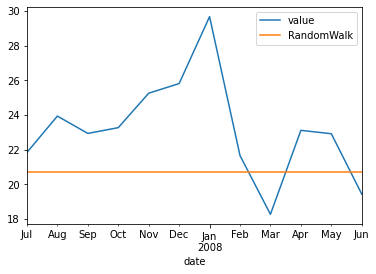

In [27]:
# POR FAVOR COMPLETÁ CON TU CÓDIGO:
df_test.plot(kind="line", y = ["value", "RandomWalk"]);

In [28]:
# Calculamos el RMSE y almacenamos los resultados
df_Results.loc[1, "Model"] = "Random Walk"
df_Results.loc[1, "RMSE"] = RMSE(df_test.RandomWalk, df_test.value)
df_Results

,Model,RMSE
0,Mean,13.5556
1,Random Walk,3.77151


Vemos que tomar la última observación del set de entranamiento mejoró significaticamente nuestras predicciones en el set de testeo respecto a tomar la media de todo el dataset.

<a id="section_tendencia_lineal"></a> 
#### 3.4- Tendencia Lineal:
[volver a TOC](#section_toc)

Continuaremos trabajando con la tendencia lineal entre value y time, fiteando nuestro modelo de regresión lineal entre "Value" y "timeIndex". En esta práctica vamos a usar la API formula de statsmodels, pero podríamos usar cualquier otra librería para realizar la regresión. 

In [29]:
model_linear = smf.ols('value ~ timeIndex', data = df_train).fit()

El primer argumento corresponde a la forma funcional de nuestra estimación. [Más detalles](http://www.statsmodels.org/dev/examples/notebooks/generated/formulas.html).

In [30]:
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     1104.
Date:                Tue, 25 Jan 2022   Prob (F-statistic):           4.48e-81
Time:                        21:38:01   Log-Likelihood:                -403.54
No. Observations:                 192   AIC:                             811.1
Df Residuals:                     190   BIC:                             817.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6940      0.286      5.921      0.000       1.130       2.258
timeIndex      0.0861      0.003     33.223      0.000       0.081       0.091
==============================================================================
Omnibus:                       58.489   Durbin-Watson:                   1.167
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.940
Skew:                           1.250   Prob(JB):                     2.80e-38
Kurtosis:                       6.920   Cond. No.                         220.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Observamos los resultados de la estimación del modelo. Vemos que la tendencia lineal es una variable significativa con un p-valor prácticamente igual a cero y que el R2 es igual a 0,853.


Veamos las predicciones del modelo sobre el set de entrenamiento:

In [31]:
df_train["LinearTrend"] = model_linear.predict(df_train.timeIndex)

Ploteamos los resultados de la predicción:

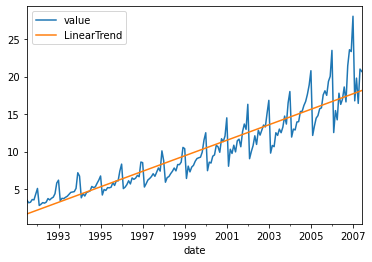

In [32]:
df_train.plot(kind = "line", y = ["value","LinearTrend"]);

Veamos las predicciones del modelo sobre el set de testeo:

In [33]:
# POR FAVOR COMPLETÁ CON TU CÓDIGO:
df_test["LinearTrend"] = model_linear.predict(df_test.timeIndex)

Ploteamos los resultados de la predicción:

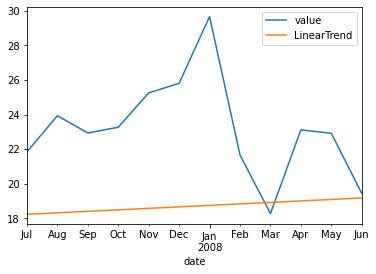

In [34]:
# POR FAVOR COMPLETÁ CON TU CÓDIGO:
df_test.plot(kind = "line", y = ["value","LinearTrend"]);

Calculamos el error y añadimos estos datos a nuestro DF de resultados para comparar con el modelo anterior:

In [35]:
df_Results.loc[2, "Model"] = "LinearTrend"
df_Results.loc[2, "RMSE"] = RMSE(df_test.LinearTrend, df_test.value)
df_Results

,Model,RMSE
0,Mean,13.5556
1,Random Walk,3.77151
2,LinearTrend,5.35015


Vemos que en este caso la tendencia lineal no logra reducir el RMSE en el set de testeo. 

<a id="section_tendencia_cuadratica"></a> 
#### 3.5- Tendencia Cuadrática:
[volver a TOC](#section_toc)

Continuaremos trabajando con la tendencia cuadrática entre value y time:

In [36]:
# Ahora fiteamos nuestro modelo de regresión lineal entre value y timeIndex + timeIndex_sq

model_quadratic = smf.ols('value ~ timeIndex + timeIndex_sq', data = df_train).fit()

In [37]:
# Observamos el summary del modelo:

# POR FAVOR COMPLETÁ CON TU CÓDIGO:
model_quadratic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     731.3
Date:                Tue, 25 Jan 2022   Prob (F-statistic):           1.08e-89
Time:                        21:38:02   Log-Likelihood:                -379.59
No. Observations:                 192   AIC:                             765.2
Df Residuals:                     189   BIC:                             774.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.7416      0.377      9.915      0.000       2.997       4.486
timeIndex        0.0214      0.009      2.347      0.020       0.003       0.039
timeIndex_sq     0.0003   4.63e-05      7.318      0.000       0.000       0.000
==============================================================================
Omnibus:                       42.894   Durbin-Watson:                   1.497
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.412
Skew:                           0.910   Prob(JB):                     2.62e-27
Kurtosis:                       6.463   Cond. No.                     4.86e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Vemos que la componente cuadrática es significativa, ya que también tiene un p-valor cercano a cero y el R2 mejora a 0,886. En este caso, en realidad es más correcto comparar R2 ajustados ya que estamos comparando modelos con diferentes cantidad de features. Vemos entonces que el R2-ajustado mejora de 0,852 en el modelo lineal a 0,884. Podemos ver además que tanto el AIC como el BIC se redujeron, corroborando una mejor bondad de ajuste. 

Veamos las predicciones del modelo sobre el set de entrenamiento:

In [38]:
df_train["QuadraticTrend"] = model_quadratic.predict(df_train[["timeIndex",\
                                                      "timeIndex_sq"]])

Ploteamos los resultados de la predicción:

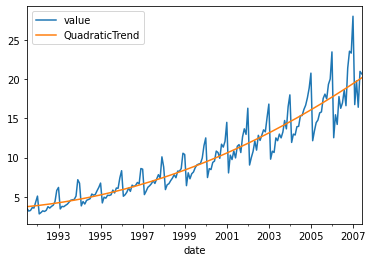

In [39]:
df_train.plot(kind = "line", y = ["value","QuadraticTrend"]);

Veamos las predicciones del modelo sobre el set de testeo:

In [40]:
df_test["QuadraticTrend"] = model_quadratic.predict(df_test[["timeIndex",\
                                                      "timeIndex_sq"]])

Ploteamos los resultados de la predicción:

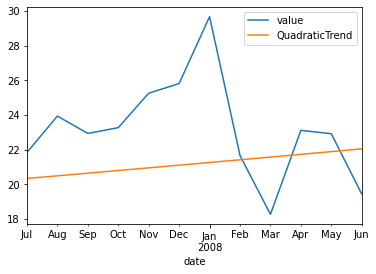

In [41]:
# POR FAVOR COMPLETÁ CON TU CÓDIGO:
df_test.plot(kind = "line", y = ["value", "QuadraticTrend"]);

Agregamos las predicciones al DataFrame de testeo:

In [42]:
# Añadimos estos datos a nuestro DF de resultados para comparar con el modelo anterior
df_Results.loc[3, "Model"] = "QuadraticTrend"
df_Results.loc[3, "RMSE"] = RMSE(df_test.QuadraticTrend, df_test.value)
df_Results

,Model,RMSE
0,Mean,13.5556
1,Random Walk,3.77151
2,LinearTrend,5.35015
3,QuadraticTrend,3.62462


Ahora sí, vemos que trabajar con un trend cuadrático mejora el RMSE, llevándolo a 3,62.

<a id="section_tendencia_transformacion_log"></a> 
#### 3.6- Tendencia con transformación logarítmica:
[volver a TOC](#section_toc)

Analizando los datos, vemos que la varianza de la serie aumenta con el paso del tiempo. 

Veamos si una transformación logarítimica con ayuda a estabilizar la varianza:

In [43]:
df_train['log_value'] = np.log(df_train['value'])
df_test['log_value'] = np.log(df_test['value'])

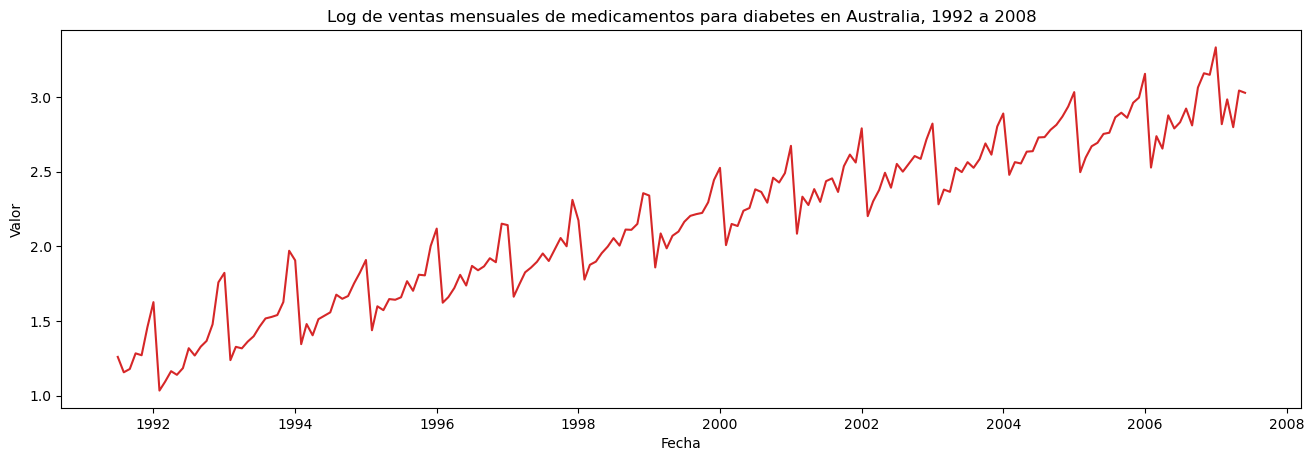

In [44]:
plot_df(df_train, x=df_train.index, y=df_train['log_value'],\
    title='Log de ventas mensuales de medicamentos para diabetes en Australia, 1992 a 2008')

Ahora fiteamos nuestro modelo de regresión lineal entre log_value y timeIndex:

In [45]:
model_log = smf.ols('log_value ~ timeIndex ', data = df_train).fit()

Veamos el summary del modelo:

In [46]:
# POR FAVOR COMPLETÁ CON TU CÓDIGO:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_value   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     2101.
Date:                Tue, 25 Jan 2022   Prob (F-statistic):          1.15e-104
Time:                        21:38:02   Log-Likelihood:                 86.148
No. Observations:                 192   AIC:                            -168.3
Df Residuals:                     190   BIC:                            -161.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2703      0.022     56.892      0.000       1.226       1.314
timeIndex      0.0093      0.000     45.835      0.000       0.009       0.010
==============================================================================
Omnibus:                        7.239   Durbin-Watson:                   1.405
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                7.331
Skew:                           0.479   Prob(JB):                       0.0256
Kurtosis:                       3.005   Cond. No.                         220.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Vemos que trabajar con la transformación logarítmica mejora la bondad de ajuste del modelo ya que el R2 ajustado es de 0,917.  Podemos ver además que tanto el AIC como el BIC volvieron a reducirse, indicando una mejor bondad de ajuste. 

Veamos las predicciones:

In [47]:
df_train['model_log'] = model_log.predict(df_train[["timeIndex"]])
df_test['model_log'] = model_log.predict(df_test[["timeIndex"]])

Almacenamos las predicciones del modelo en el set de entrenamiento y testeo luego de haber realizado back-transformation:

In [48]:
df_train['back_model_log'] = np.exp(df_train['model_log'])
df_test['back_model_log'] = np.exp(df_test['model_log'])

In [49]:
df_test.head()

,value,year,month,timeIndex,timeIndex_sq,Aug,Dec,Feb,Jan,Jul,...,Oct,Sep,Mean,valueShift1,RandomWalk,LinearTrend,QuadraticTrend,log_value,model_log,back_model_log
date,,,,,,,,,,,,,,,,,,,,,
2007-07-01,21.834890,2007,Jul,192,36864,0,0,0,0,1,...,0,0,9.914647,20.681002,20.681002,18.221353,20.333919,3.083509,3.049907,21.113388
2007-08-01,23.930204,2007,Aug,193,37249,1,0,0,0,0,...,0,0,9.914647,21.834890,20.681002,18.307433,20.485675,3.175141,3.059176,21.309993
2007-09-01,22.930357,2007,Sep,194,37636,0,0,0,0,0,...,0,1,9.914647,23.930204,20.681002,18.393513,20.638107,3.132462,3.068445,21.508428
2007-10-01,23.263340,2007,Oct,195,38025,0,0,0,0,0,...,1,0,9.914647,22.930357,20.681002,18.479593,20.791217,3.146879,3.077714,21.708711
2007-11-01,25.250030,2007,Nov,196,38416,0,0,0,0,0,...,0,0,9.914647,23.263340,20.681002,18.565673,20.945004,3.228827,3.086982,21.910859


Ploteamos los resultados de la predicción en el set de entrenamiento **sin** back-transformation:


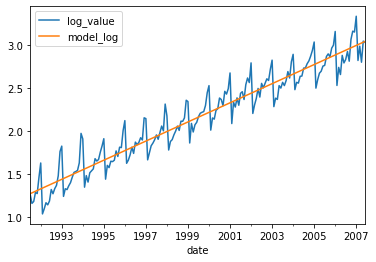

In [50]:
df_train.plot(kind = "line", y = ['log_value', 'model_log']);

Ploteamos los resultados de la predicción en el set de entrenamiento **con** back-transformation:

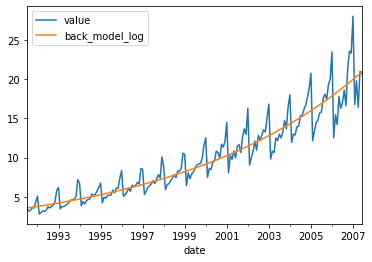

In [51]:
df_train.plot(kind = "line", y = ['value', 'back_model_log']);

Ploteamos los resultados de la predicción en el set de testeo **sin** back-transformation:

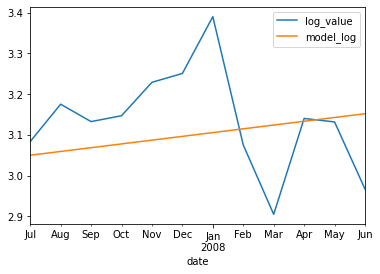

In [52]:
# POR FAVOR COMPLETÁ CON TU CÓDIGO:
df_test.plot(kind = "line", y = ['log_value', 'model_log']);

Ploteamos los resultados de la predicción en el set de testeo **con** back-transformation:

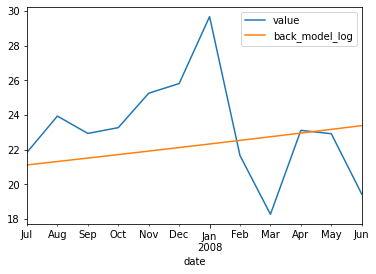

In [53]:
# POR FAVOR COMPLETÁ CON TU CÓDIGO:
df_test.plot(kind = "line", y = ['value', 'back_model_log']);

In [54]:
# Añadimos estos datos a nuestro DF de resultados para comparar con el modelo anterior:
df_Results.loc[4, "Model"] = "Transf Log"
df_Results.loc[4, "RMSE"] = RMSE(df_test['back_model_log'], df_test['value'])
df_Results

,Model,RMSE
0,Mean,13.5556
1,Random Walk,3.77151
2,LinearTrend,5.35015
3,QuadraticTrend,3.62462
4,Transf Log,3.25311


Vemos una mejoría en el RMSE con el modelo logarítmico. 

<a id="section_tendencia_transformacion_log_estacionalidad"></a> 
#### 3.7- Tendencia con transformación logarítmica + estacionalidad mensual:
[volver a TOC](#section_toc)

Ahora fiteamos nuestro modelo de regresión lineal entre log_value y timeIndex más las dummies de mes:

In [55]:
model_log_est = smf.ols('log_value ~ timeIndex + Aug + Dec + Feb + Jan + Jul + Jun + Mar + May + Nov + Oct + Sep',\
                          data = df_train).fit()

In [56]:
model_log_est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_value   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1235.
Date:                Tue, 25 Jan 2022   Prob (F-statistic):          3.89e-165
Time:                        21:38:03   Log-Likelihood:                 272.28
No. Observations:                 192   AIC:                            -518.6
Df Residuals:                     179   BIC:                            -476.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.1232      0.017     65.773      0.000       1.090       1.157
timeIndex      0.0093   7.92e-05    117.731      0.000       0.009       0.009
Aug            0.1357      0.021      6.320      0.000       0.093       0.178
Dec            0.3629      0.021     16.911      0.000       0.321       0.405
Feb           -0.0969      0.021     -4.515      0.000      -0.139      -0.055
Jan            0.4366      0.021     20.345      0.000       0.394       0.479
Jul            0.1357      0.021      6.321      0.000       0.093       0.178
Jun            0.0702      0.021      3.271      0.001       0.028       0.113
Mar            0.0209      0.021      0.973      0.332      -0.021       0.063
May            0.0855      0.021      3.986      0.000       0.043       0.128
Nov            0.2205      0.021     10.276      0.000       0.178       0.263
Oct            0.1987      0.021      9.257      0.000       0.156       0.241
Sep            0.1350      0.021      6.290      0.000       0.093       0.177
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   1.489
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.170
Skew:                          -0.071   Prob(JB):                        0.557
Kurtosis:                       3.355   Cond. No.                     1.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div id="caja1" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/> </div>
  <div style="float:left;width: 85%;"><label>¿Todos los meses son significativos?<br/> 

Vemos que al agregar las dummies mensuales, la bondad del modelo mejora sustancialmente. El R2 ajustado pasa de 0,917 a 0.987. Por otro lado, vemos que los coeficientes de todos los meses son significativos, con excepción del mes de marzo, cuyo p-valor es de 0,332. Podríamos volver a entrenar el modelo sin el mes de marzo para ver si mejora. En este caso también, los criterios AIC y BIC se redujeron, confirmando la mejoría en la bondad de ajuste indicada por el R2 ajustado.


Calculamos las predicciones:

In [57]:
df_train['model_log_est'] = model_log_est.predict(df_train[["timeIndex", \
                                              "Aug", "Dec", "Feb", "Jan",\
                                               "Jul", "Jun", "Mar", "May",\
                                                "Nov", "Oct", "Sep"]])


df_test['model_log_est'] = model_log_est.predict(df_test[["timeIndex", \
                                              "Aug", "Dec", "Feb", "Jan",\
                                               "Jul", "Jun", "Mar", "May",\
                                                "Nov", "Oct", "Sep"]])

Almacenamos las predicciones del modelo en el set de entrenamiento y testeo luego de haber realizado back-transformation:

In [58]:
df_train['back_model_log_est'] = np.exp(df_train['model_log_est'])
df_test['back_model_log_est'] = np.exp(df_test['model_log_est'])

In [59]:
df_test.head()

,value,year,month,timeIndex,timeIndex_sq,Aug,Dec,Feb,Jan,Jul,...,Mean,valueShift1,RandomWalk,LinearTrend,QuadraticTrend,log_value,model_log,back_model_log,model_log_est,back_model_log_est
date,,,,,,,,,,,,,,,,,,,,,
2007-07-01,21.834890,2007,Jul,192,36864,0,0,0,0,1,...,9.914647,20.681002,20.681002,18.221353,20.333919,3.083509,3.049907,21.113388,3.048636,21.086557
2007-08-01,23.930204,2007,Aug,193,37249,1,0,0,0,0,...,9.914647,21.834890,20.681002,18.307433,20.485675,3.175141,3.059176,21.309993,3.057925,21.283353
2007-09-01,22.930357,2007,Sep,194,37636,0,0,0,0,0,...,9.914647,23.930204,20.681002,18.393513,20.638107,3.132462,3.068445,21.508428,3.066579,21.468344
2007-10-01,23.263340,2007,Oct,195,38025,0,0,0,0,0,...,9.914647,22.930357,20.681002,18.479593,20.791217,3.146879,3.077714,21.708711,3.139561,23.093726
2007-11-01,25.250030,2007,Nov,196,38416,0,0,0,0,0,...,9.914647,23.263340,20.681002,18.565673,20.945004,3.228827,3.086982,21.910859,3.170737,23.825048


Ploteamos los resultados de la predicción en el set de entrenamiento **sin** back-transformation:

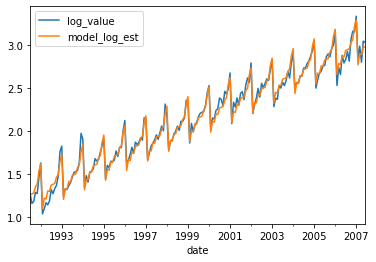

In [60]:
df_train.plot(kind = "line", y = ['log_value', 'model_log_est']);

Ploteamos los resultados de la predicción en el set de entrenamiento **con** back-transformation:

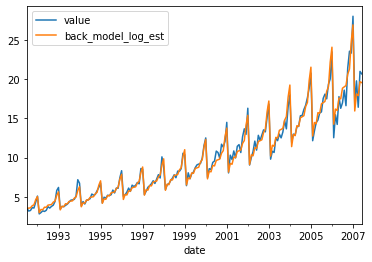

In [61]:
df_train.plot(kind = "line", y = ['value', 'back_model_log_est']);

Ploteamos los resultados de la predicción en el set de testeo **sin** back-transformation:

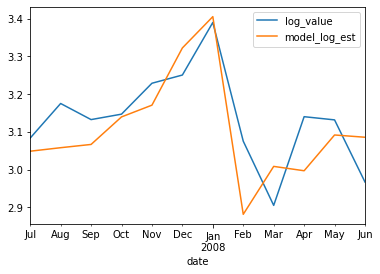

In [62]:
# POR FAVOR COMPLETÁ CON TU CÓDIGO:
df_test.plot(kind = "line", y = ['log_value', 'model_log_est']);

Ploteamos los resultados de la predicción en el set de testeo **con** back-transformation:

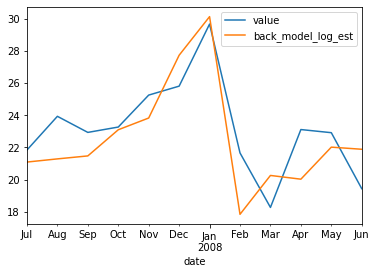

In [63]:
# POR FAVOR COMPLETÁ CON TU CÓDIGO:
df_test.plot(kind = "line", y = ['value', 'back_model_log_est']);

In [64]:
df_Results.loc[5, "Model"] = "Transf Log + est"
df_Results.loc[5, "RMSE"] = RMSE(df_test['back_model_log_est'], df_test['value'])
df_Results

,Model,RMSE
0,Mean,13.5556
1,Random Walk,3.77151
2,LinearTrend,5.35015
3,QuadraticTrend,3.62462
4,Transf Log,3.25311
5,Transf Log + est,2.05195


Vemos que al modelar la estacionalidad mensual agregando las variables dummy, nuestro modelos mejora sustancialmente, reduciéndose el RMSE de 3,25 a 2,05.

<a id="section_exponential_smoothing"></a> 
#### 3.8- Single Exponential Smoothing:
[volver a TOC](#section_toc)

El **suavizamiento exponencial simple** otorga más importancia a la información reciente y menos a la pasada. En su forma más simple podemos expresarlo como:

$$ \widehat{y_t} =\alpha . y_{t-1}  + (1 - \alpha ) . \widehat{y}_{t -1} $$

Aquí el modelo es un promedio ponderado entre el valor actual y el valor anterior del modelo.
$\alpha$  se conoce como smoothing factor.

In [65]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model_exp_smoothing = SimpleExpSmoothing(df_train.value).fit(smoothing_level=0.3,\
                                                            optimized=False)

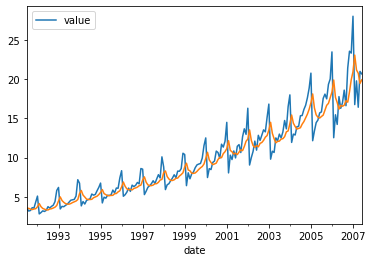

In [66]:
df_train.plot(kind = "line", y = "value")
model_exp_smoothing.fittedvalues.plot();

###### Time Series Cross Validation 

Antes de comenzar a construir un modelo, veamos primero cómo optimizar los hiperparámetros del modelo automáticamente.

¿Cómo podemos hacer para realizar validación cruzada con series de tiempo? Las series de tiempo tienen una estructura temporal y no se pueden mezclar los valores aleatoriamente en una partición mientras se conserva esta estructura. Con la aleatorización, se perderán todas las dependencias temporales entre las observaciones. Es por esto que tendremos que usar un enfoque más complicado para optimizar los parámetros del modelo. Utilizaremos es "cross validation on a rolling basis".

La idea es bastante simple: entrenamos nuestro modelo en un pequeño segmento de la serie de tiempo desde el principio hasta algunas t, hacemos predicciones para los siguientes t + n pasos y calculamos un error. Luego, expandimos nuestra muestra de entrenamiento a valor t + n, hacemos predicciones desde t + n hasta t + 2 ∗ n, y continuamos moviendo nuestro segmento de prueba de la serie de tiempo hasta que alcanzamos la última observación disponible. Como resultado, tenemos folds como n cabrá entre la muestra de entrenamiento inicial y la última observación

<img src="img/ts_validation.png" alt="drawing" width="600"/>

Aplicamos un split entre train y test para series de tiempo:

In [67]:
from sklearn.model_selection import TimeSeriesSplit 

tscv = TimeSeriesSplit(n_splits=5)

Con fines ilustrativos, vamos a hacer un print de los elementos del set de entrenamiento y validación para cada fold:

In [96]:
for train_index, val_index in tscv.split(df_train):
    print("\nTRAIN:", train_index, "\nVAL:", val_index)


TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31] 
VAL: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63]

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63] 
VAL: [64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87
 88 89 90 91 92 93 94 95]

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95] 
VAL: [ 96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127]

TRAIN: [  0   1   2   3   4   5   6   7 

Definimos una función que aplica time series cross validation para el modelo single exponential smoothing:

In [69]:
from sklearn.metrics import mean_squared_error

def timeseriesCVscore_exp_smoot(alpha, series):
    """
        Returns error on CV  
        
        params - vector of parameters for optimization
        series - dataset with timeseries
        slen - season length for Holt-Winters model
    """
    # creamos un array de errores:
    errors = []
    
    values = series.values
    
    # instanciamos el objeto que realiza el tscv:
    tscv = TimeSeriesSplit(n_splits=5) 
    
    # Aplicamos cross validation:

    for train, test in tscv.split(values):
    
        model = SimpleExpSmoothing(values[train]).fit(smoothing_level=alpha,\
                                                             optimized=False)
        
        predictions = model.forecast(len(test))
        actual = values[test]
    
        error = mean_squared_error(predictions, actual)
        errors.append(error)
        
    return np.mean(np.array(errors))

In [70]:
alphas = [0.001, 0.01, 0.1, 0.2, 0.3, 0.35, 0.4, 0.5, 0.7]
errors = []

for alpha in alphas:
    error = timeseriesCVscore_exp_smoot(alpha, df_train.value)
    errors.append(error)

print('Alpha óptimo:', alphas[np.argmin(errors)])

Alpha óptimo: 0.5


In [71]:
# Entrenamos el modelo optimizado:

model_exp_smoothing = SimpleExpSmoothing(df_train.value).fit(smoothing_level=alphas[np.argmin(errors)],\
                                                             optimized=False)

In [72]:
df_test["Simple_Smoothing"] = model_exp_smoothing.forecast(12)
df_test.head()

,value,year,month,timeIndex,timeIndex_sq,Aug,Dec,Feb,Jan,Jul,...,valueShift1,RandomWalk,LinearTrend,QuadraticTrend,log_value,model_log,back_model_log,model_log_est,back_model_log_est,Simple_Smoothing
date,,,,,,,,,,,,,,,,,,,,,
2007-07-01,21.834890,2007,Jul,192,36864,0,0,0,0,1,...,20.681002,20.681002,18.221353,20.333919,3.083509,3.049907,21.113388,3.048636,21.086557,20.192834
2007-08-01,23.930204,2007,Aug,193,37249,1,0,0,0,0,...,21.834890,20.681002,18.307433,20.485675,3.175141,3.059176,21.309993,3.057925,21.283353,20.192834
2007-09-01,22.930357,2007,Sep,194,37636,0,0,0,0,0,...,23.930204,20.681002,18.393513,20.638107,3.132462,3.068445,21.508428,3.066579,21.468344,20.192834
2007-10-01,23.263340,2007,Oct,195,38025,0,0,0,0,0,...,22.930357,20.681002,18.479593,20.791217,3.146879,3.077714,21.708711,3.139561,23.093726,20.192834
2007-11-01,25.250030,2007,Nov,196,38416,0,0,0,0,0,...,23.263340,20.681002,18.565673,20.945004,3.228827,3.086982,21.910859,3.170737,23.825048,20.192834


In [73]:
model_simp_smo_RMSE = RMSE(df_test["Simple_Smoothing"], df_test.value)
model_simp_smo_RMSE

4.110187300262552

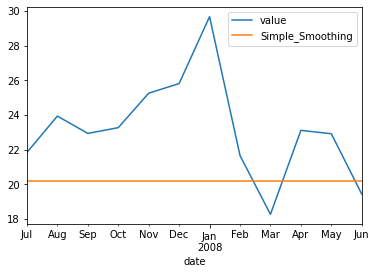

In [74]:
df_test.plot(kind="line", y = ["value", "Simple_Smoothing"]);

In [75]:
# Calculamos el RMSE y almacenamos los resultados
df_Results.loc[6, "Model"] = "Simple Smoothing"
df_Results.loc[6, "RMSE"] = RMSE(df_test["Simple_Smoothing"], df_test.value)
df_Results

,Model,RMSE
0,Mean,13.5556
1,Random Walk,3.77151
2,LinearTrend,5.35015
3,QuadraticTrend,3.62462
4,Transf Log,3.25311
5,Transf Log + est,2.05195
6,Simple Smoothing,4.11019


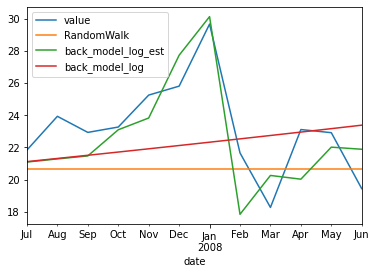

In [76]:
# Ploteamos las mejores estimaciones 
df_test.plot(kind = "line", y = ["value", "RandomWalk", "back_model_log_est",\
                                                 "back_model_log"]);

<div id="caja7" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/en_resumen.png" style="align:left"/> </div>
  <br>
  <br>  
  <div style="float:left;width: 85%;"><label><b>En conclusión...</b></label></div>
</div>
<br>

Podemos descomponer una serie de tiempo en:

- **Tendencia**: componente “permanente”, el efecto persiste en el largo plazo. Se puede interpretar como lo que motiva el cambio a largo plazo de la media.
- **Estacionalidad**: esta componente aporta movimientos periódicos a la serie.
- **Ciclos**: se entiende por cualquier tipo de dinámica no capturada por la tendencia o la estacionalidad. Estamos ante la presencia de ciclos cuando observamos algún tipo de dinámica mediante la cual el presente está vinculado al pasado. No tiene por qué ser un ciclo rígido.
- **Componente aleatoria**: son shocks que no presentan un efecto duradero, ya que las suponemos i.i.d. con media 0 y varianza constante.

De manera aditiva, podemos decir entonces que: 

$$ y_t = T_t + S_t + C_t + \varepsilon_t. $$

- Para modelar la tendencia y la estacionalidad podemos usar dummies de tiempo y estacionales. 


[volver a TOC](#section_toc)